# Objective

This notebook shows the distribution of differences between spots and their nearest neighbors for spot images generated on 12 July 2018.

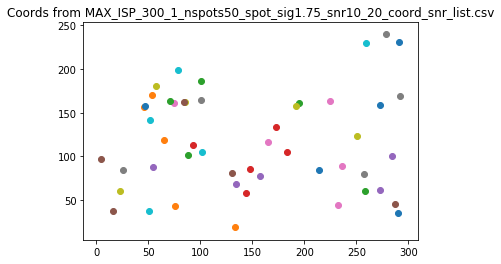

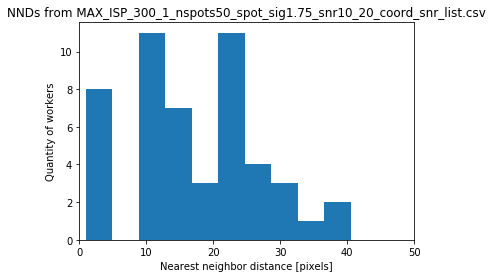

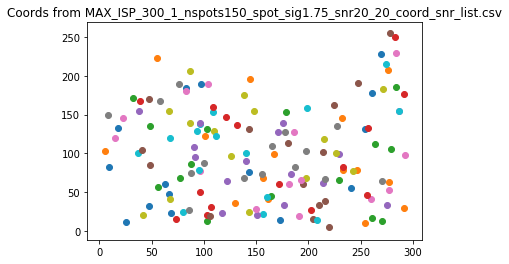

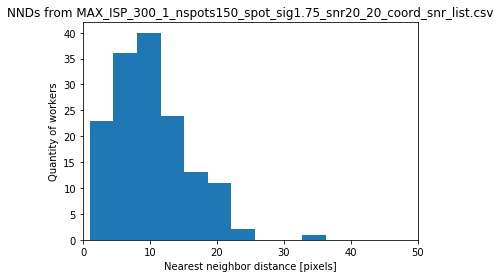

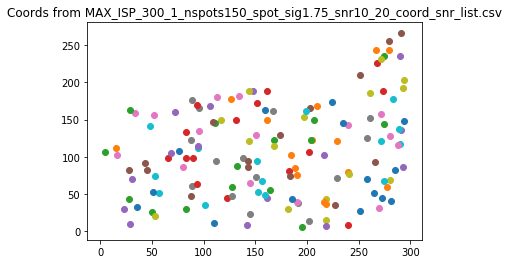

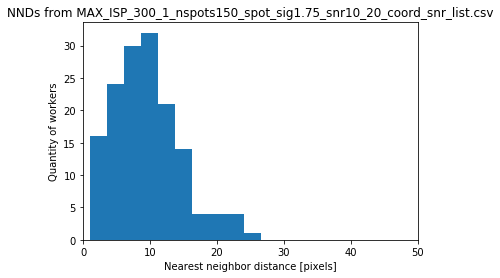

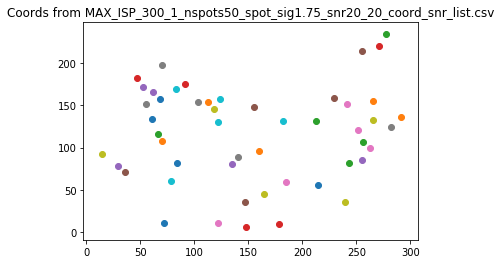

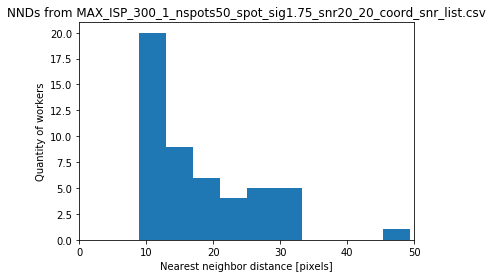

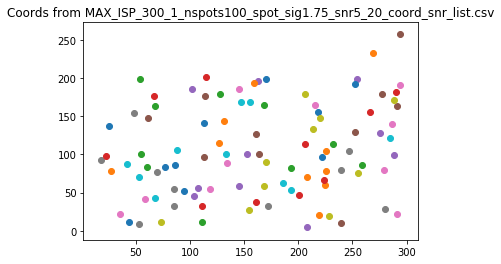

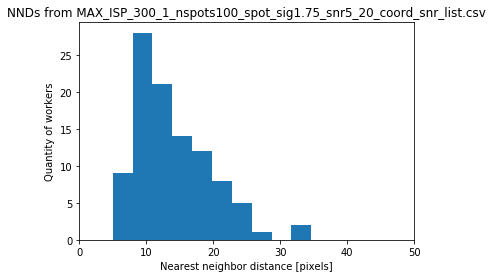

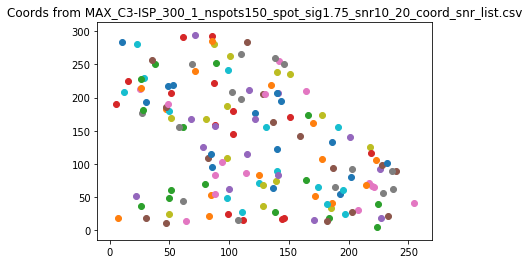

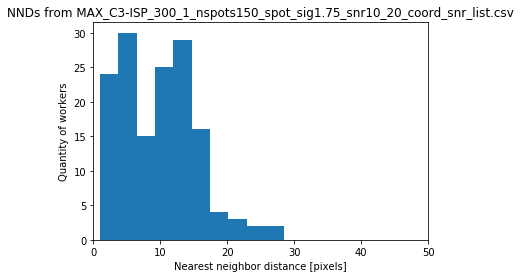

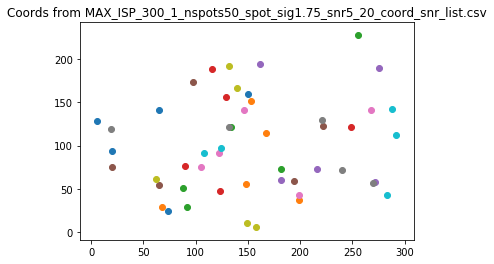

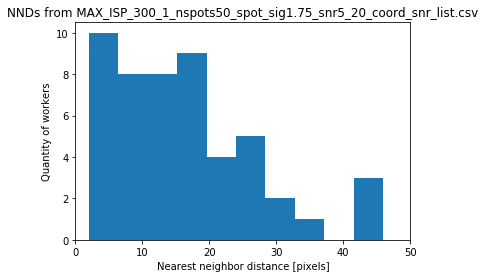

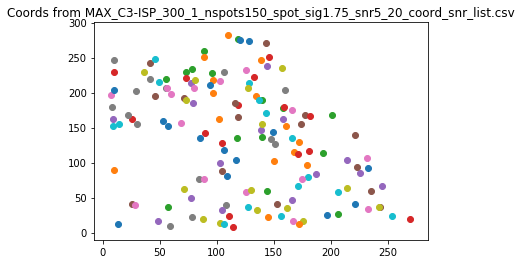

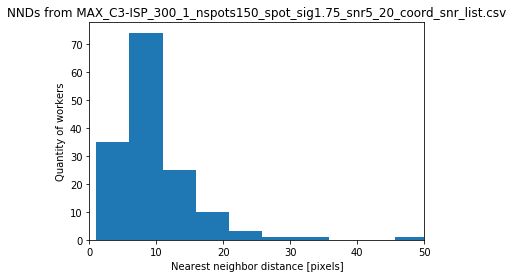

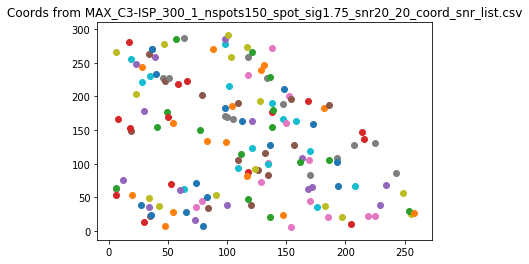

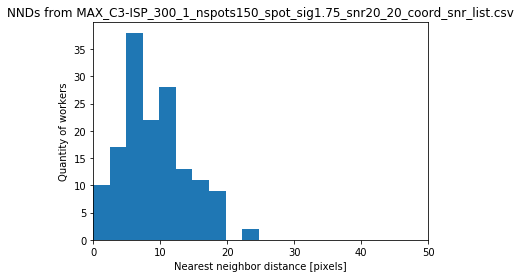

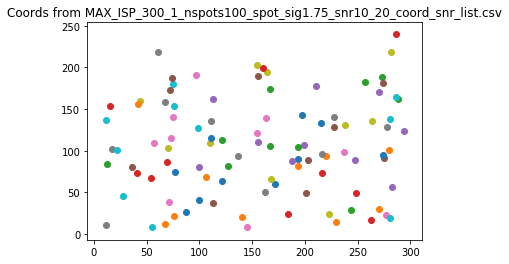

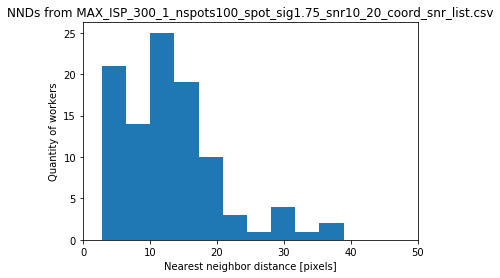

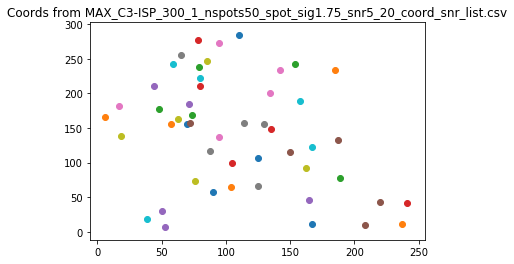

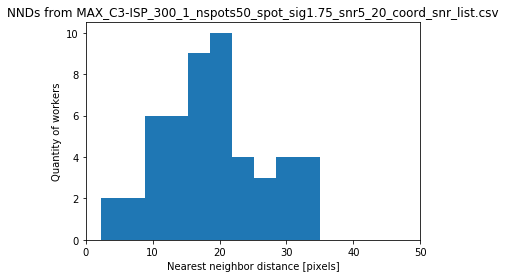

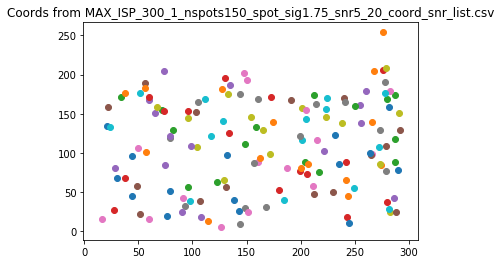

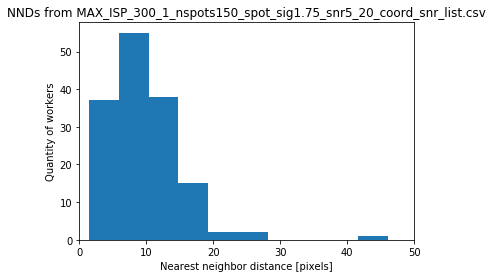

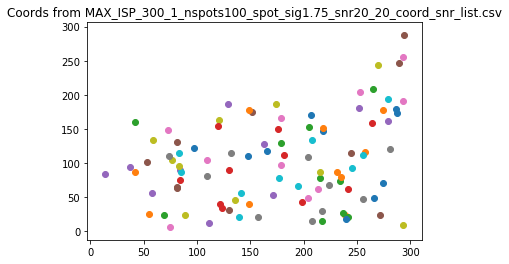

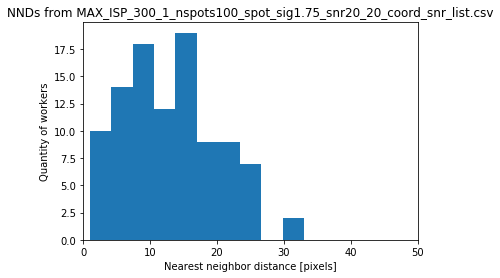

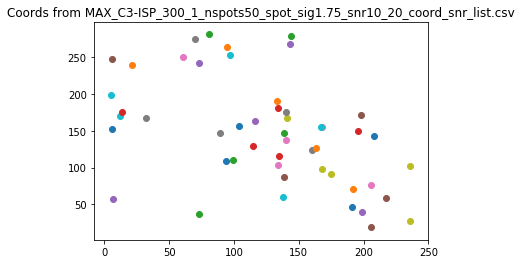

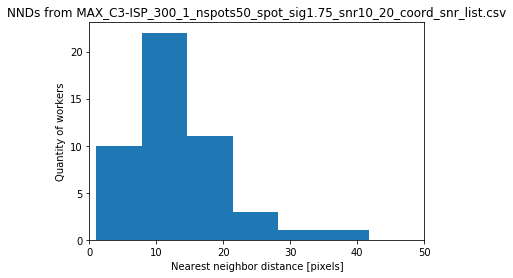

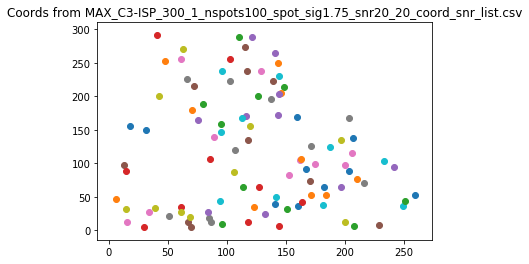

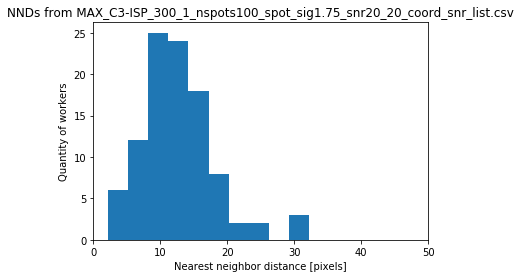

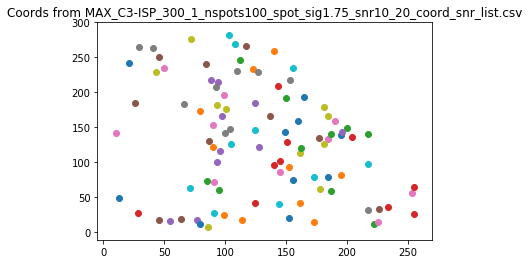

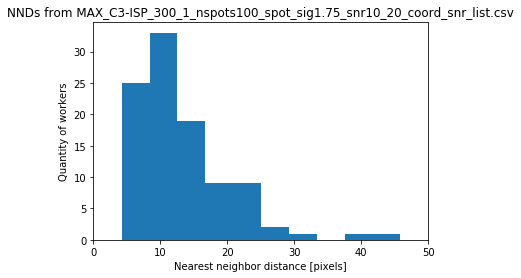

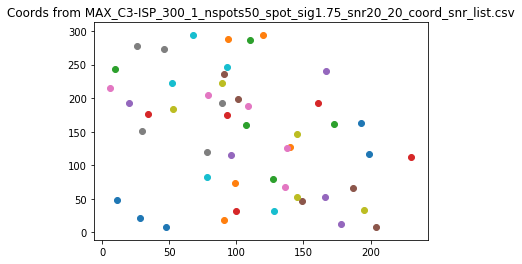

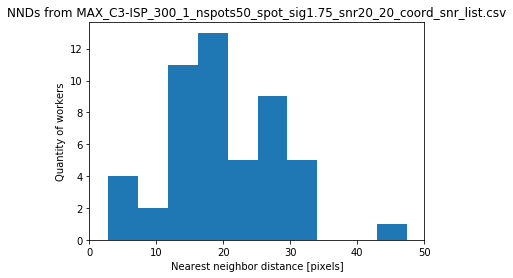

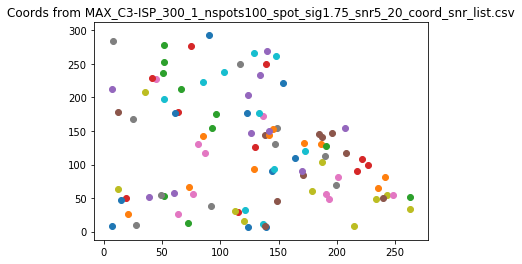

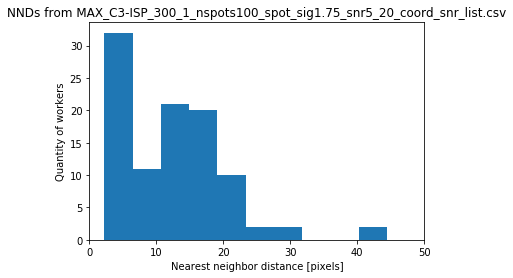

In [20]:
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import os

csv_filename = 'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr5_20_coord_snr_list.csv'

directory = os.fsencode(os.getcwd())

for file in os.listdir(directory):
    csv_filename = os.fsdecode(file)
    if csv_filename.endswith(".csv"): 
        coords_snr = np.genfromtxt(csv_filename, delimiter=',')
        coords = coords_snr[:,:2]
        kdt = KDTree(coords, leaf_size=2, metric='euclidean')
        
        fig = plt.figure()
        plt.title('Coords from '+csv_filename)

        dist_list = []
        for coord in coords:
            dist, ind = kdt.query([coord], k=3)
            nn_dist = dist[0][1]
            dist_list.append(nn_dist)
            plt.scatter([coord[0]], [coord[1]])
            
        # Plot histograms of nearest neighbor distances
        fig = plt.figure()
        n_bins = 10
        plt.title('NNDs from '+csv_filename)
        plt.xlabel('Nearest neighbor distance [pixels]')
        plt.xlim(0,50)
        plt.ylabel('Quantity of workers')
        plt.hist(dist_list, n_bins)
        plt.show()
    else:
        continue



    